In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({"figure.dpi": 300})

In [2]:
df = pd.read_csv("../data/dc_bikes_new.csv", index_col = 0) # loading cleaned bike data set

df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,month,day,part_of_day
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16,0,1,5,night
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40,1,1,5,night
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32,2,1,5,night
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13,3,1,5,night
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1,4,1,5,night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,156,19,12,0,evening
17375,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,104,20,12,0,evening
17376,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,67,21,12,0,night
17377,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,43,22,12,0,night


### Pivotting based on count column

In [3]:
df_pivot = df.pivot_table(

    values = 'count',
    index = ['hour'],
    columns = 'day',
    aggfunc ='sum' ).reset_index()

In [4]:
#renaming columns
df_pivot.rename(columns={ 0 :'monday',1 :'tuesday',2:'wednesday',3:"thursday",4:"friday",5:'saturday',6:"sunday"}, inplace=True)

In [5]:
df_pivot

day,hour,monday,tuesday,wednesday,thursday,friday,saturday,sunday
0,0,3519,2801,3693,4198,5443,10197,9877
1,1,1866,1313,1703,1862,2553,7219,7914
2,2,1117,764,959,1089,1382,5192,5979
3,3,623,477,598,664,766,2446,2950
4,4,605,555,515,631,656,999,1083
5,5,2152,2288,2507,2694,2543,1217,1181
6,6,8608,10045,10680,11247,10017,2652,2023
7,7,24767,28014,29935,31952,27621,5413,4179
8,8,41064,44961,48959,51479,50226,12625,9206
9,9,21900,22735,24260,25094,27268,19891,16713


### Plotting rides initiated on different days over hours

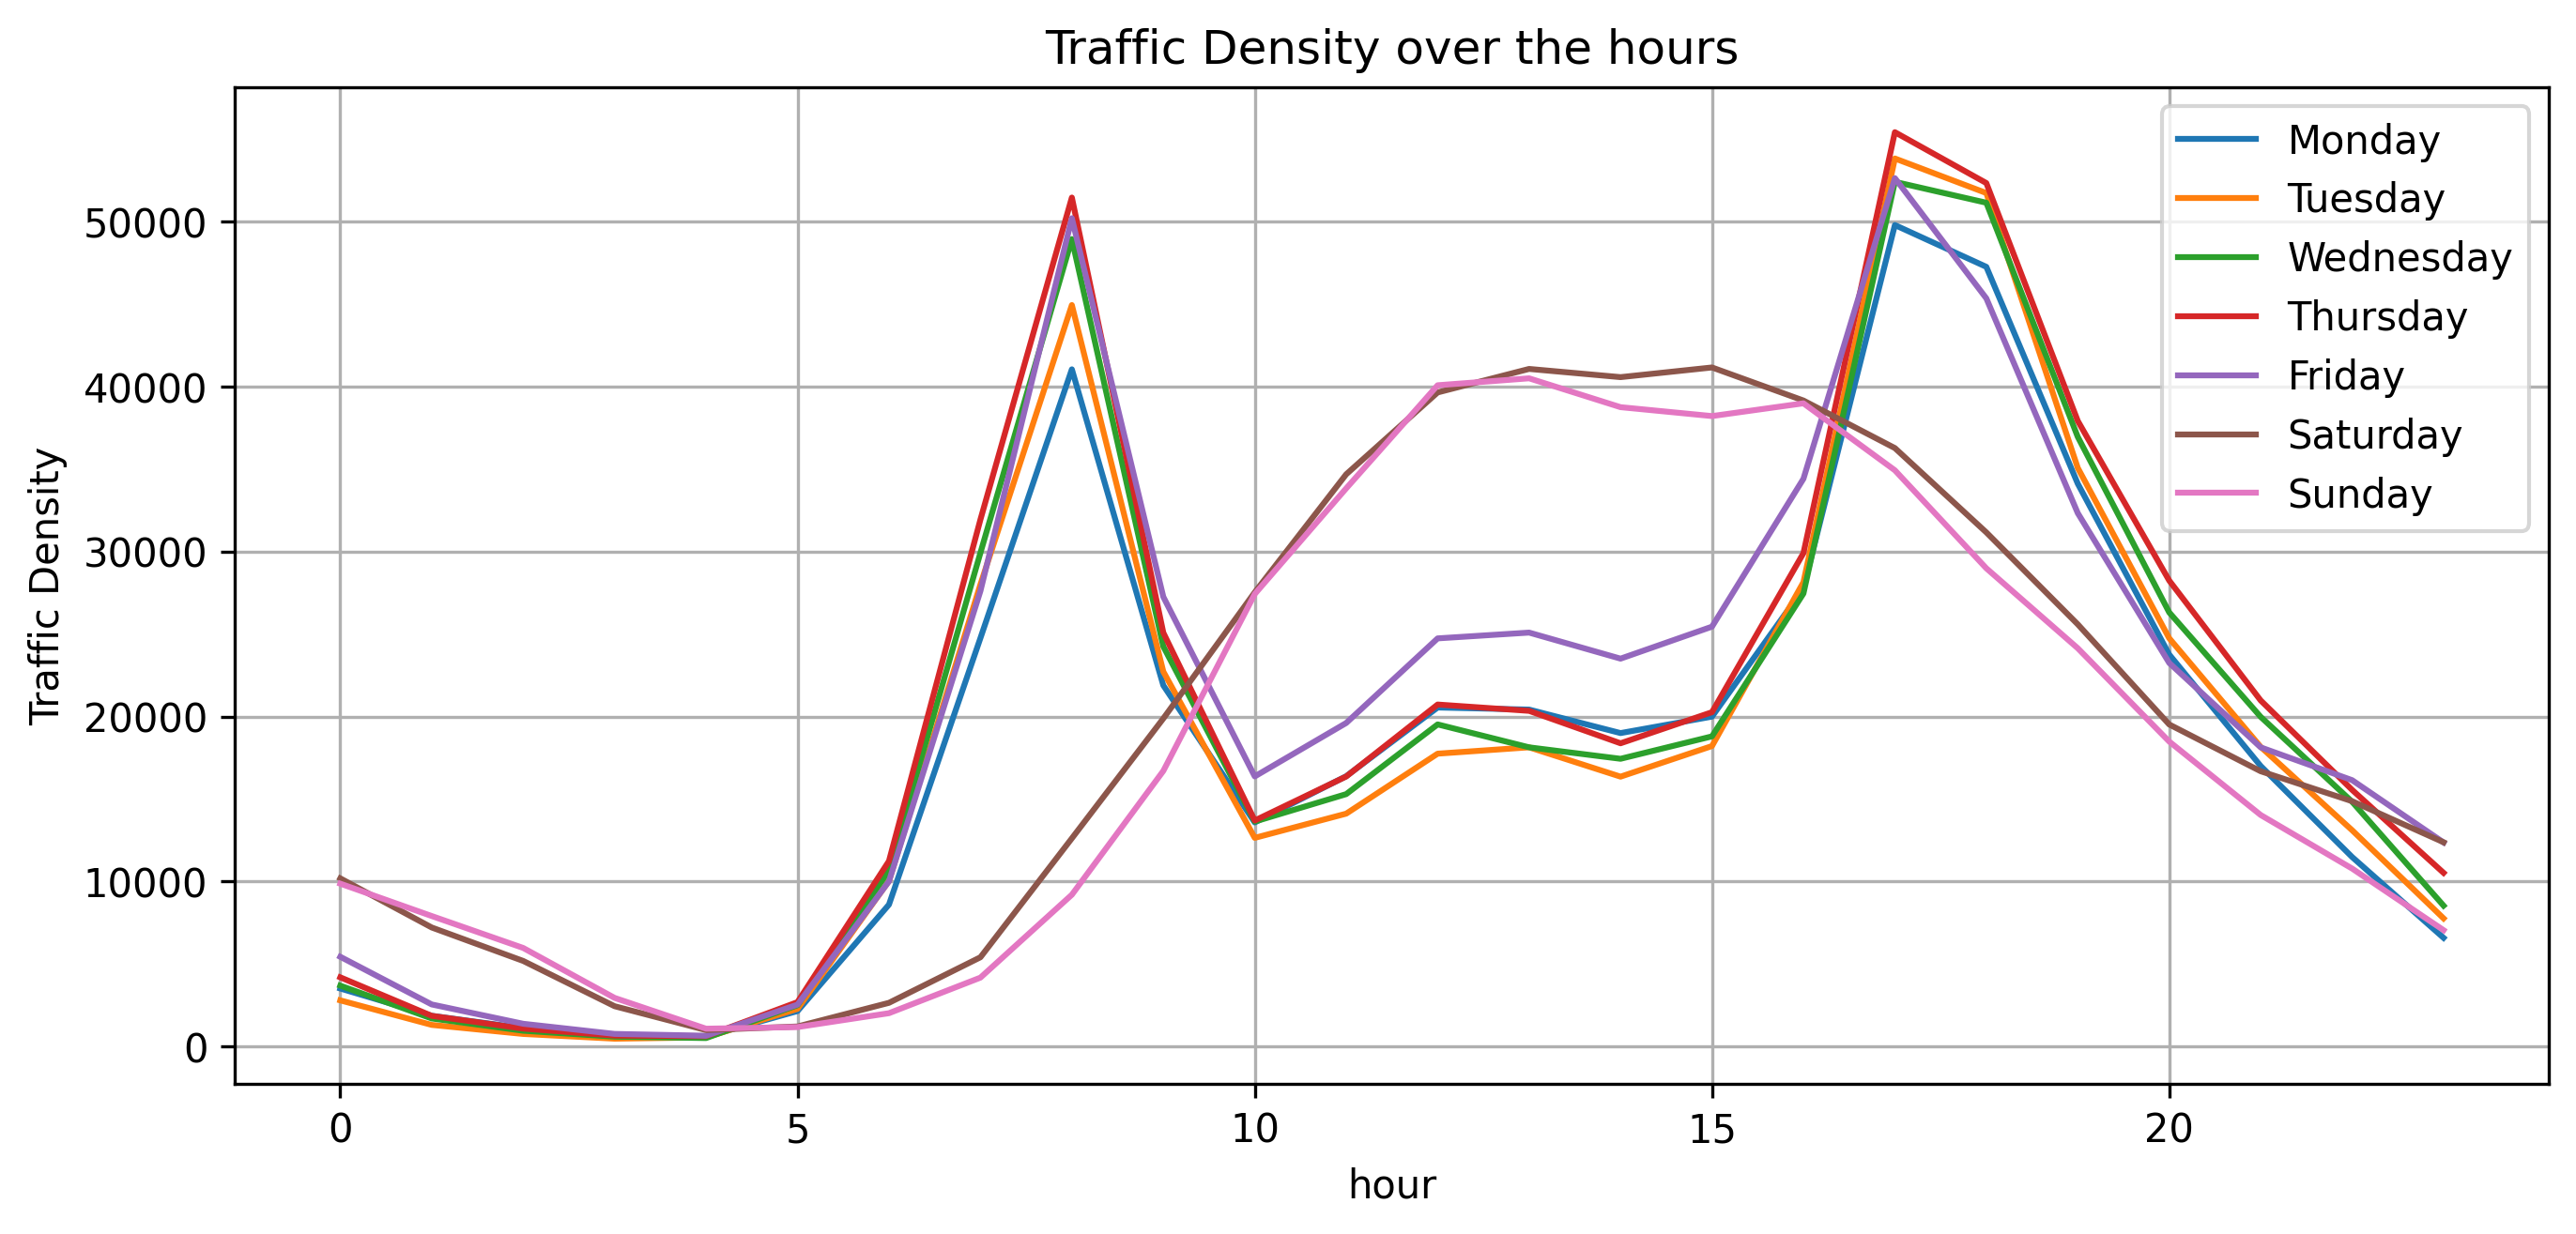

In [6]:
plt.figure(figsize=(10.6,4.6))


sns.lineplot(data = df_pivot, x = 'hour', y ="monday", label = "Monday")
sns.lineplot(data = df_pivot, x = 'hour', y ="tuesday", label ="Tuesday")
sns.lineplot(data = df_pivot, x = 'hour', y ="wednesday", label ="Wednesday")
sns.lineplot(data = df_pivot, x = 'hour', y ="thursday", label ="Thursday")
sns.lineplot(data = df_pivot, x = 'hour', y ="friday", label ="Friday")
sns.lineplot(data = df_pivot, x = 'hour', y ="saturday", label ="Saturday")
sns.lineplot(data = df_pivot, x = 'hour', y ="sunday", label ="Sunday")
plt.grid()
plt.title("Traffic Density over the hours")
plt.ylabel("Traffic Density")
plt.legend();

In [7]:
df_bar = df.groupby("day").agg({"count" : "sum"})

df_bar

,count
day,
0,434064
1,443873
2,464419
3,491728
4,498021
5,488324
6,457471


### Plotting bar charts for number of rides per day of the week

Text(0, 0.5, 'Number of Rides')

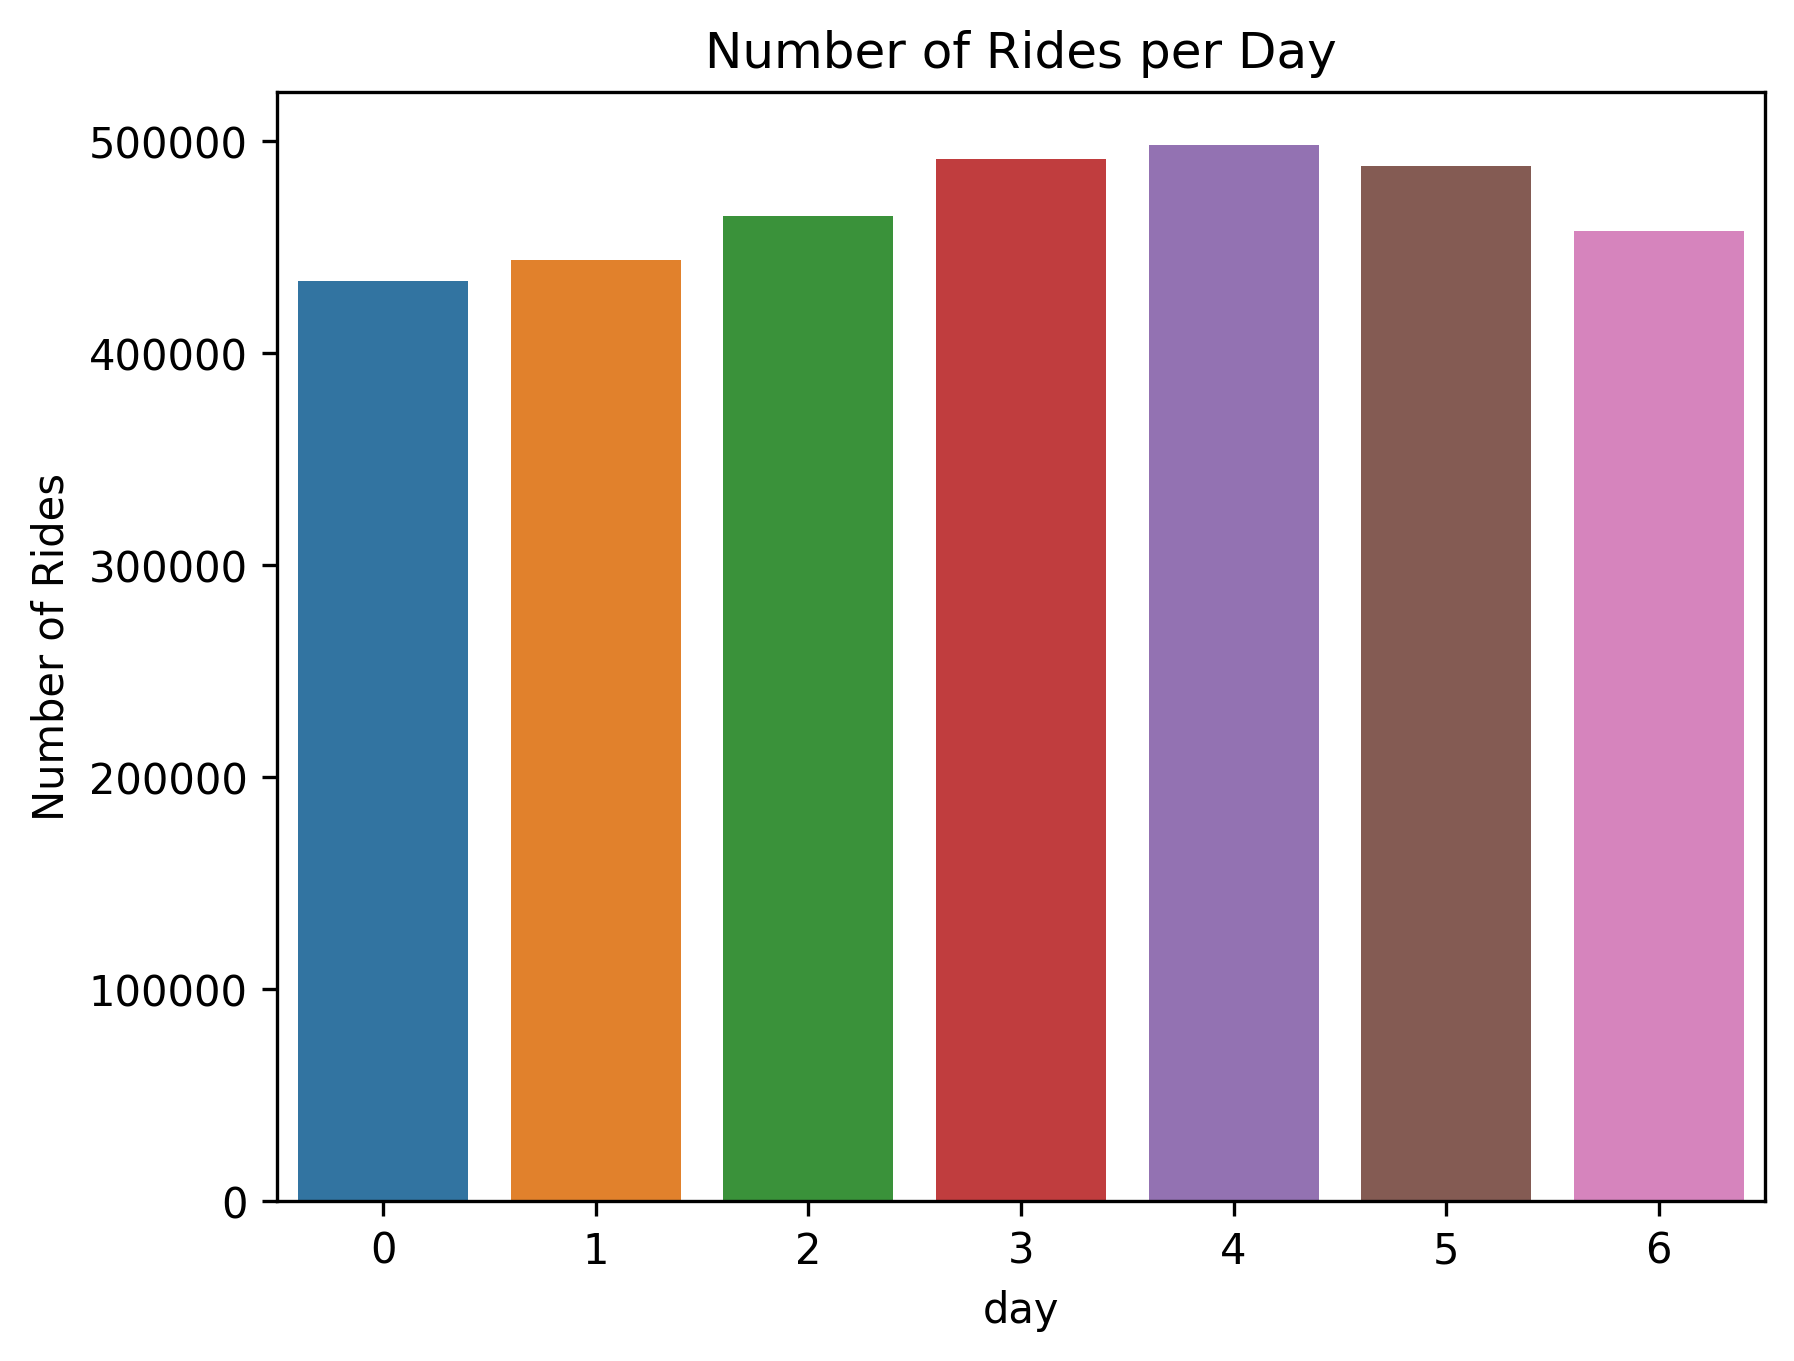

In [8]:
sns.barplot(data = df_bar, x  = df_bar.index, y = "count")
plt.title("Number of Rides per Day")
plt.ylabel("Number of Rides")

### Plotting Average Number of Rider per Hour on Weekday and Weekend

In [9]:
# pivot table for number of rides per hour for weekdays

df_pivot_weekday = df[(df["day"] > -1) & (df["day"] < 5) ].pivot_table(

    values = 'count',
    index = ['hour'],
    aggfunc ='mean' ).reset_index()

df_pivot_weekday



,hour,count
0,0,38.015474
1,1,18.052427
2,2,10.454724
3,3,6.409836
4,4,6.044898
5,5,23.612403
6,6,97.866538
7,7,275.220503
8,8,457.812379
9,9,234.539652


In [10]:
# pivot table for number of rides per hour for weekends

df_pivot_weekend = df[(df["day"] == 5) | (df["day"] == 6) ].pivot_table(

    values = 'count',
    index = ['hour'],
    aggfunc ='mean' ).reset_index()

df_pivot_weekend



,hour,count
0,0,96.047847
1,1,72.406699
2,2,53.966184
3,3,25.818182
4,4,10.057971
5,5,11.930348
6,6,22.475962
7,7,45.676190
8,8,103.957143
9,9,174.304762


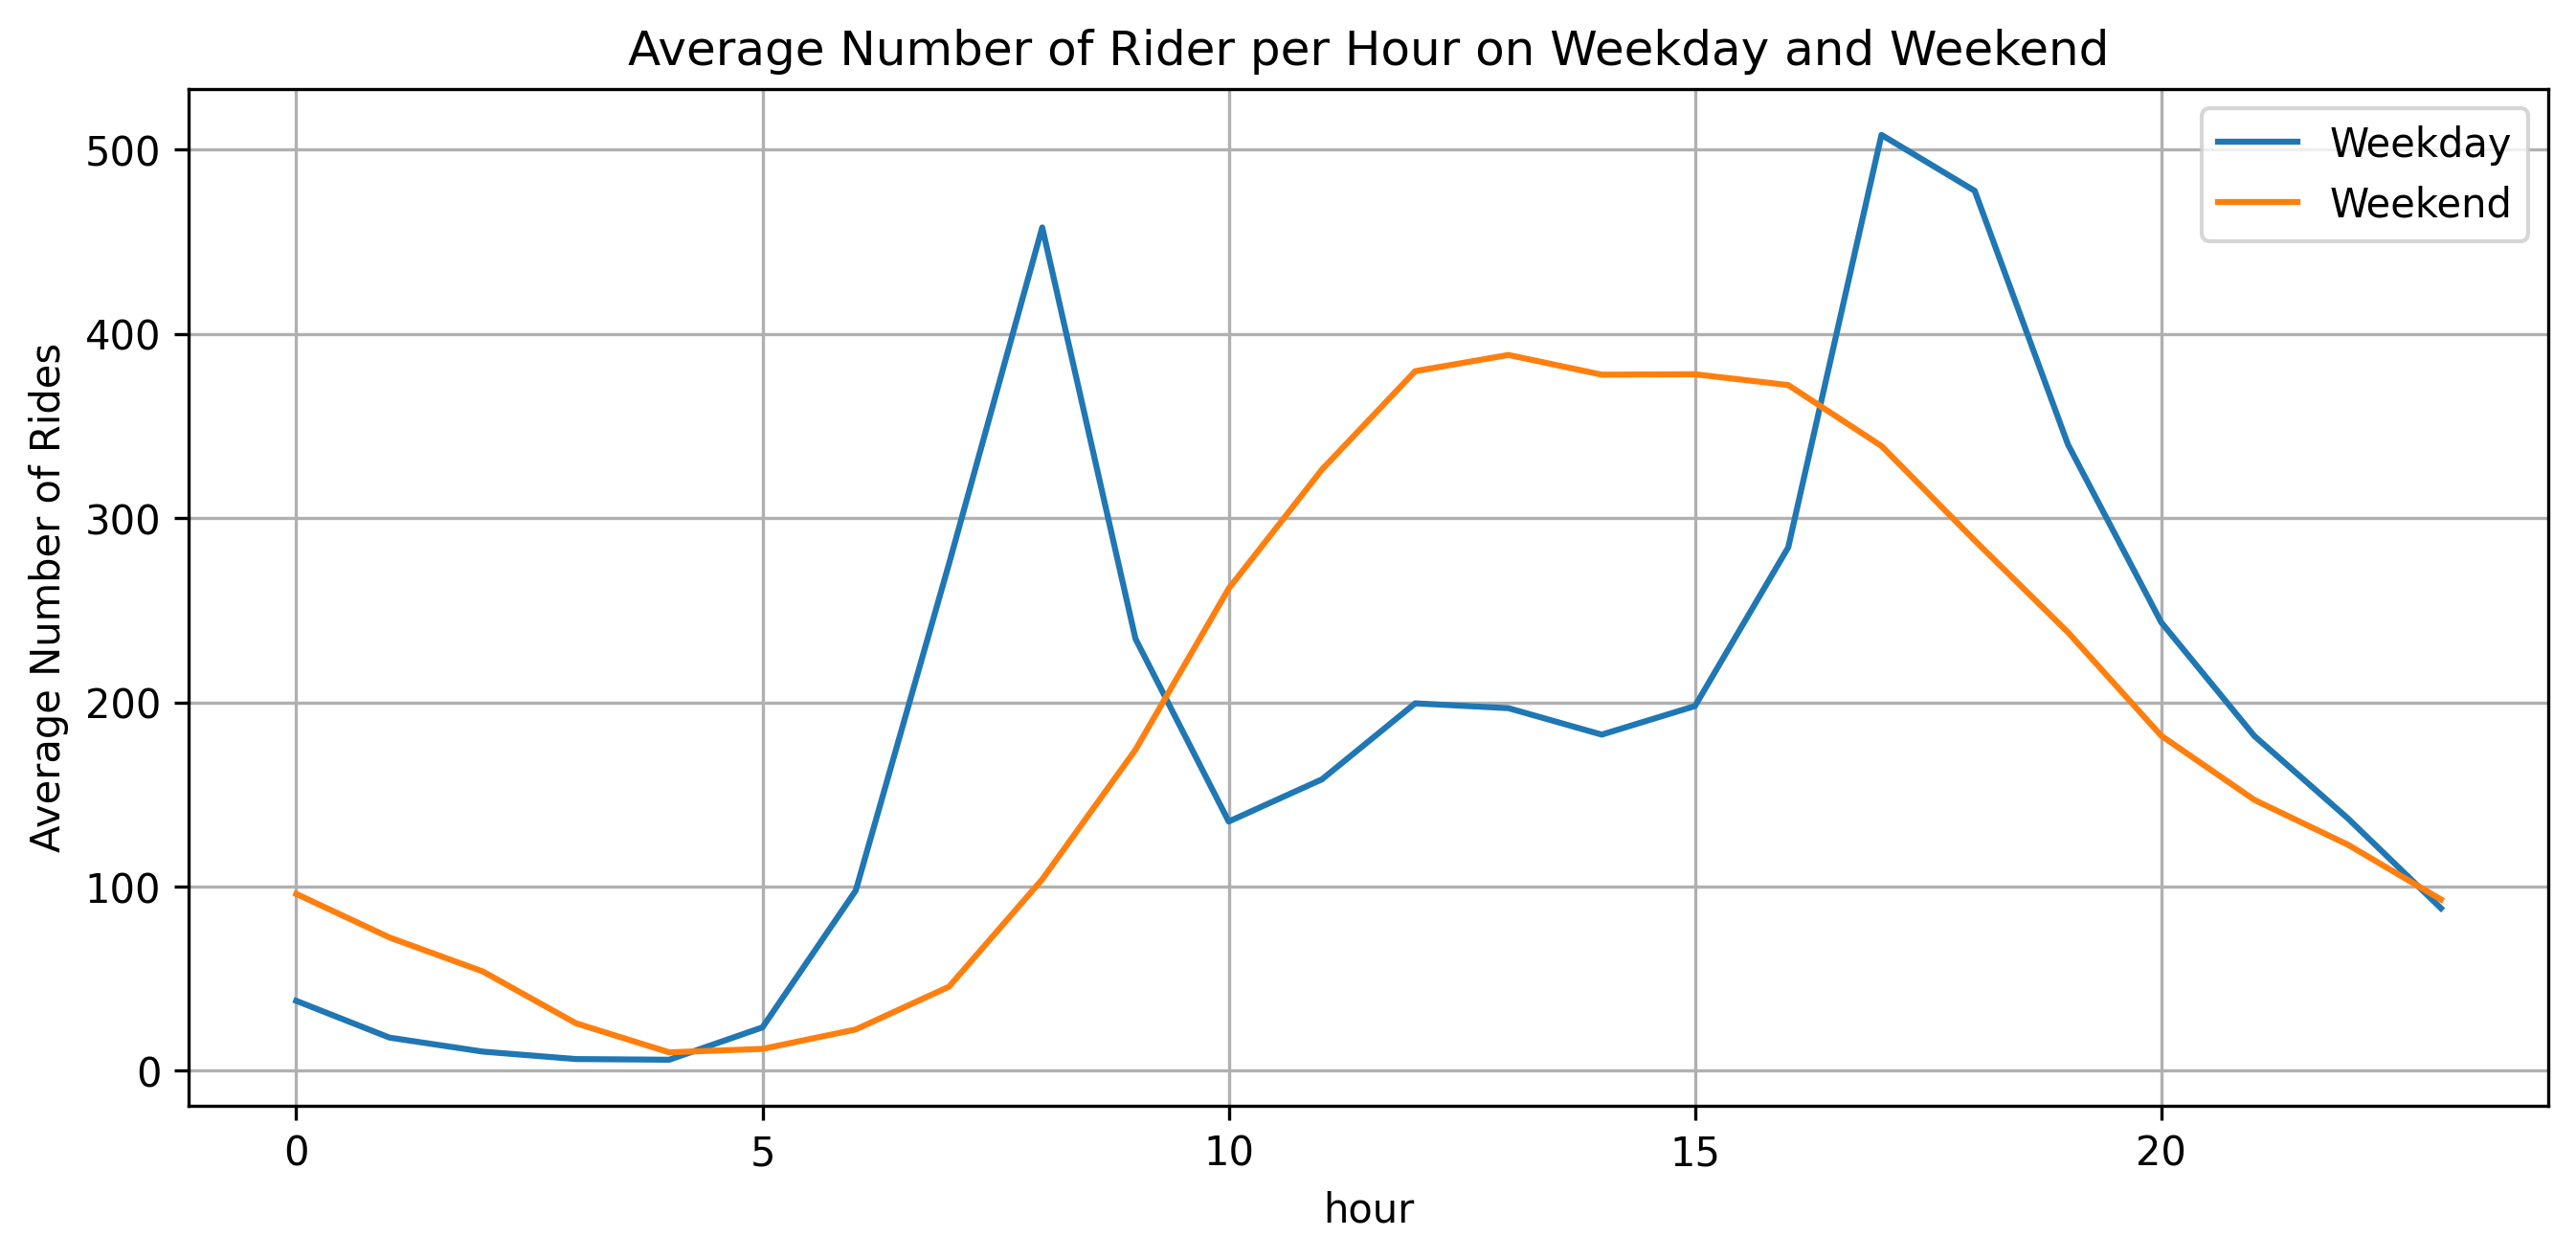

In [11]:
plt.figure(figsize=(10.6,4.6))

sns.lineplot(data = df_pivot_weekday, x = 'hour', y ="count", label = "Weekday")
sns.lineplot(data = df_pivot_weekend, x = 'hour', y ="count", label ="Weekend")

plt.grid()
plt.ylabel("Average Number of Rides")
plt.title("Average Number of Rider per Hour on Weekday and Weekend")
plt.legend();